In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [13]:
data = pd.read_csv('/content/drive/MyDrive/데청캠 수업 자료/0706 앙상블/datafile.csv', encoding='latin-1')

data.head()
#파일 로드 후 데이터 확인

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people?s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ?tobacco-free school??guidelines (%),Schools aware of the policy for displaying ?tobacco-free school??board (%)
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5


In [14]:
data.columns
#데이터 칼럼 확인

Index(['State/UT', 'Area', 'Ever tobacco users (%)',
       'Current tobacco users (%)', 'Ever tobacco smokers (%)',
       'Current tobacco smokers (%)', 'Ever cigarette users (%)',
       'Current cigarette users (%)', 'Ever bidi users (%) ',
       'Current bidi users (%)', 'Ever smokeless tobacco users (%)',
       'Current smokeless tobacco users (%)',
       'Ever users of  paan masala together with tobacco (%)',
       'Never cigarette smokers susceptible to cigarette use in future (%)',
       'Median age of initiation of Cigarette (in years)',
       'Median age of initiation of Bidi (in years)',
       'Median age of initiation of smokeless tobacco (in years)',
       'Awareness about e-cigarette (%)', 'Ever e-cigarette use (%)',
       'Ever tobacco smokers who quit in last 12 months (%)',
       'Current tobacco smokers who tried to quit smoking in the past 12 months (%)',
       'Current tobacco smokers who wanted to quit smoking now   (%)',
       'Ever  smokeless tobacco

In [15]:
data_columns = data[['State/UT', 'Area',  'Students who noticed anti-tobacco messages anywhere in past 30 days    (%)',
       'Students who noticed anti-tobacco messages in mass media in past 30 days    (%)',
       'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)',
       'Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)',
       'Students who saw tobacco advertisements anywhere in past 30 days  (%)',
       'Students who saw anyone using tobacco on mass media in past 30 days  (%)',
       'Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%)',
       'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)']]
# 30일간 금연 메시지, 흡연 반대 메시지, 스포츠 박람회, 건강 경고 등을
# 본 학생들 %를 확인하고 어떤 마케팅이 가장 효과적이였는지를 확인하기 위한 칼럼만을 추출하여 저장

data_columns = pd.DataFrame(data_columns)

data_columns_filter = ~data_columns['Area'].isin(['Urban', 'Rural'])
#지역은 토탈, 도시, 시골로 나뉘어 있고 토탈에 데이터만을 사용하기 위해 도시와 시골은 삭제하는 과정을 거치기 위해
#Area칼럼을 True, False값으로 나는 값을 필터에 저장

filter_data = data_columns[data_columns_filter]
#저장한 필터를 통해 False는 드랍, True는 새로운 Filter_data에 저장

filter_data = filter_data.set_index('State/UT')
#새롭게 만든 filter_data에 인덱스를 해당하는 각각에 도시 이름으로 변경

filter_data.head(5)
#처리한 데이터 확인

,Area,Students who noticed anti-tobacco messages anywhere in past 30 days (%),Students who noticed anti-tobacco messages in mass media in past 30 days (%),"Students who noticed anti-tobacco messages at sporting, fairs, concerts, community events or social gatherings in past 30 days (%)",Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days (%),Students who saw tobacco advertisements anywhere in past 30 days (%),Students who saw anyone using tobacco on mass media in past 30 days (%),Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%)
State/UT,,,,,,,,,
India,Total,71.3,52.3,35.2,25.2,60.6,52.8,17.5,37.8
Andaman and Nicobar Islands,Total,74.0,57.9,40.1,29.2,57.4,46.2,21.1,23.4
Andhra Pradesh,Total,65.2,49.9,27.6,22.2,67.6,65.8,9.1,22.9
Arunachal Pradesh,Total,94.4,70.4,71.0,63.1,62.7,50.7,19.0,20.9
Assam,Total,77.0,56.9,30.4,28.3,52.4,42.1,15.5,40.0


'주/UT',
'지역',
'지난 30일 동안 어디서든 금연 메시지를 알아차린 학생들(%),
'지난 30일간 대중매체에서 흡연반대 메시지를 발견한 학생들(%),
'지난 30일간 스포츠, 박람회, 콘서트, 지역사회 행사 또는 사교 모임에서 금연 메시지를 발견한 학생(%),
'지난 30일 동안 담배 제품/담배 포장에서 건강 경고를 발견한 학생(%),
'지난 30일 동안 어디서나 담배 광고를 본 학생들(%),
'지난 30일 동안 대중 매체에서 담배를 사용하는 사람을 본 학생들(%),
'지난 30일간 판매 시점에서 담배 광고/홍보를 눈치챈 학생(%),
'지난 12개월 동안 수업시간에 담배 사용의 유해성에 대해 교육을 받은 학생들(%)

In [16]:
data_values_kmeans= filter_data[['Students who noticed anti-tobacco messages in mass media in past 30 days    (%)',
       'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)',
       'Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)',
       'Students who saw tobacco advertisements anywhere in past 30 days  (%)',
       'Students who saw anyone using tobacco on mass media in past 30 days  (%)',
       'Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%)',
       'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)',
      'Students who noticed anti-tobacco messages anywhere in past 30 days    (%)']]
#kmeans에 사용에 필요한 피처들을 새로운 data_values_kmeans에 저장

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

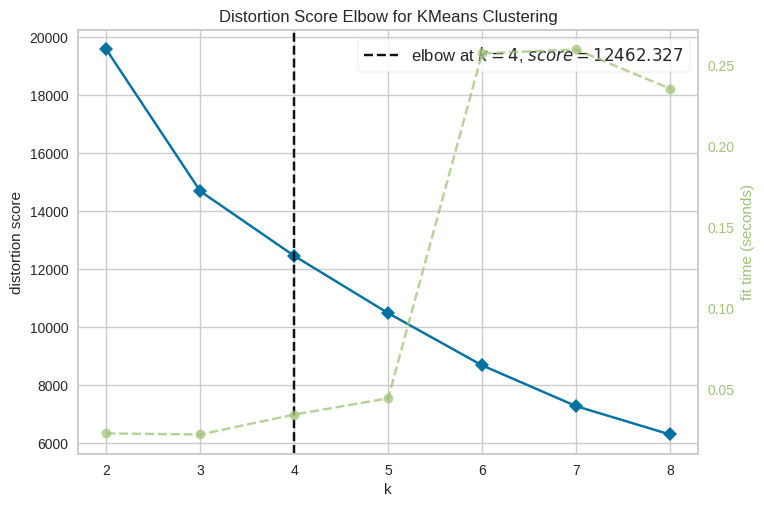

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(2, 9))
visualizer.fit(data_values_kmeans)
visualizer.show()
#k의 값을 구하기 위해 KElbowVisualizer함수 사용을 통해 적절한 k를 구함

In [18]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data_values_kmeans)
#구한 k값을 통해서 kmeans모델을 생성하고 해당 모델에 data_values_kmeans를 적용

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [47]:
labels = kmeans.labels_

# Assign labels to the original data
filter_data['Cluster_Labels'] = labels

# Analyze feature characteristics by cluster
feature_characteristics = filter_data.groupby('Cluster_Labels').mean()

# Display the feature characteristics for each cluster
print(feature_characteristics)

                Students who noticed anti-tobacco messages anywhere in past 30 days    (%)  \
Cluster_Labels                                                                               
0                                                       64.985714                            
1                                                       83.977778                            
2                                                       69.250000                            
3                                                       73.775000                            

                Students who noticed anti-tobacco messages in mass media in past 30 days    (%)  \
Cluster_Labels                                                                                    
0                                                       44.900000                                 
1                                                       57.100000                                 
2                                      

<ipython-input-47-95724cc77ab5>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  feature_characteristics = filter_data.groupby('Cluster_Labels').mean()


In [50]:
filter_data['Cluster_Labels'] = labels

# Analyze feature characteristics by cluster
feature_characteristics = filter_data.groupby('Cluster_Labels').mean()

# Sort the features based on the cluster labels
sorted_features = feature_characteristics[data_values_kmeans.columns].sort_values(by='Cluster_Labels', axis=1)

# Output the sorted features
print(sorted_features)

<ipython-input-50-729e031cbbf2>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  feature_characteristics = filter_data.groupby('Cluster_Labels').mean()


KeyError: ignored

In [19]:
data_values_clusters = data_values_kmeans
data_values_clusters['Cluster'] = kmeans.labels_
#얻은 클러스터 값을 각 해당 하는 도시에 붙이고 도시와 분류된 클러스터를 출력하여 확인

In [20]:
data_values_clusters[['Cluster']]

,Cluster
State/UT,
India,1
Andaman and Nicobar Islands,0
Andhra Pradesh,1
Arunachal Pradesh,3
Assam,0
Bihar,1
Chandigarh,1
Chhattisgarh,1
Dadra and Nagar Haweli,0


In [21]:
filter_data_pca = filter_data.drop("Area", axis=1)
#PCA에 적용하기 위해 문자형 데이터를 가지는 'Area' 칼럼 삭제

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(filter_data_pca), columns = filter_data_pca.columns)
#StandardScaler통해 데이터 정규화 진행

In [23]:
from sklearn.decomposition import PCA
#PCA import

pca = PCA(n_components=2)
#PCA를 사용하여 표준화된 데이터에 PCA를 적용, 두 개의 주 성분을 얻기 위해 2로 설정
pca_data = pca.fit_transform(df_scale)
#해당 PCA에 정규화한 데이터를 적용

In [24]:
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
#pca진행한 데이터의 칼럼 명을 PCA1. PCA2로 지정하여 데이터프레임으로 생성하여 새로운 변수에 저장
pca_df.index = filter_data.index

pca_df

,PCA1,PCA2
State/UT,,
India,0.232746,-0.337078
Andaman and Nicobar Islands,0.444717,1.073586
Andhra Pradesh,0.850772,-1.927989
Arunachal Pradesh,-3.646928,4.140320
Assam,0.230248,0.428129
Bihar,0.181300,-1.142149
Chandigarh,-1.031128,-1.532575
Chhattisgarh,-1.329112,0.085001
Dadra and Nagar Haweli,0.613459,1.160661


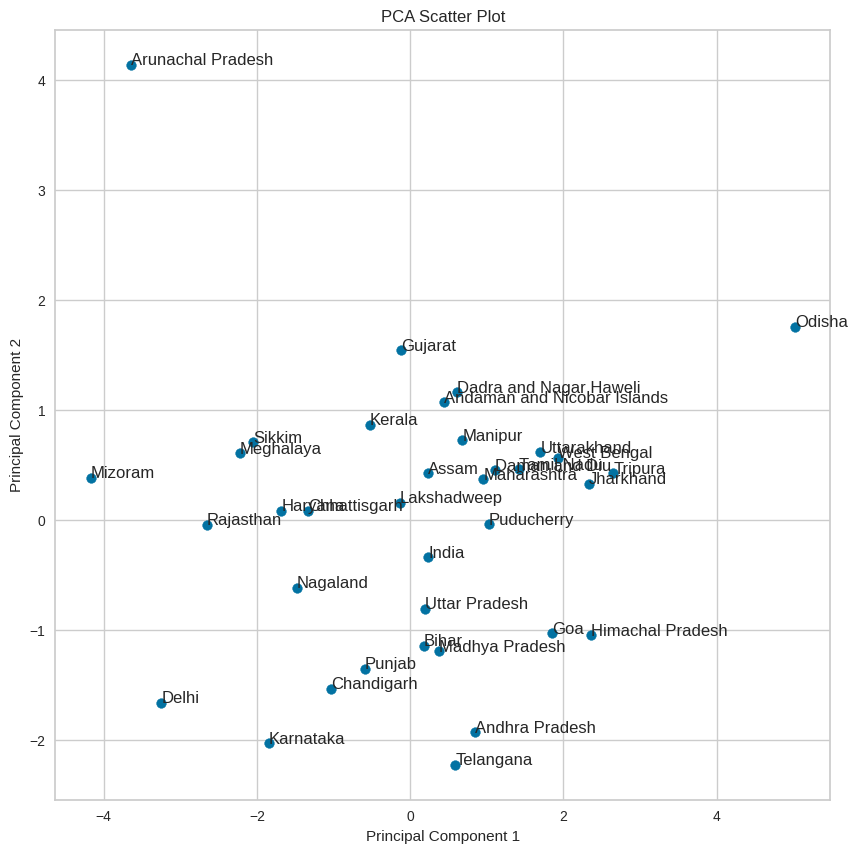

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')

for i, label in enumerate(pca_df.index):
    plt.annotate(label, (pca_df['PCA1'][i], pca_df['PCA2'][i]))

# Display the plot
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)

cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


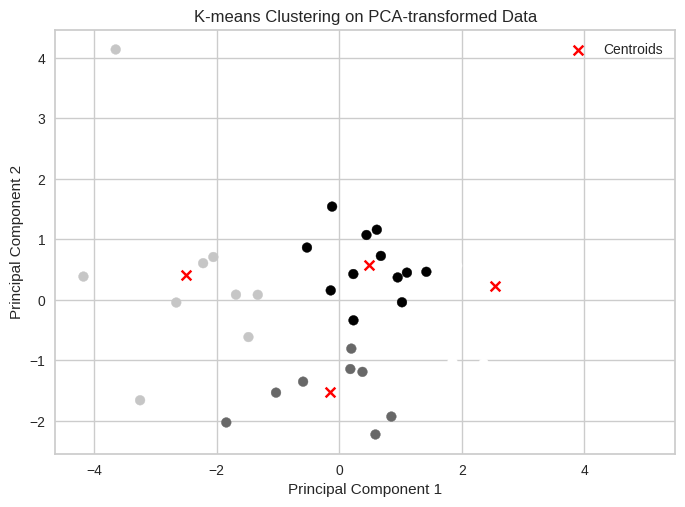

In [27]:
cluster_labels = kmeans.labels_

# Visualize the clustering results
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-transformed Data')
plt.legend()
plt.show()

<ipython-input-28-9dae94b55b70>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Students who noticed anti-tobacco messages anywhere in past 30 days    (%)'], bins=20)


Text(0.5, 1.0, 'Students who noticed anti-tobacco messages')

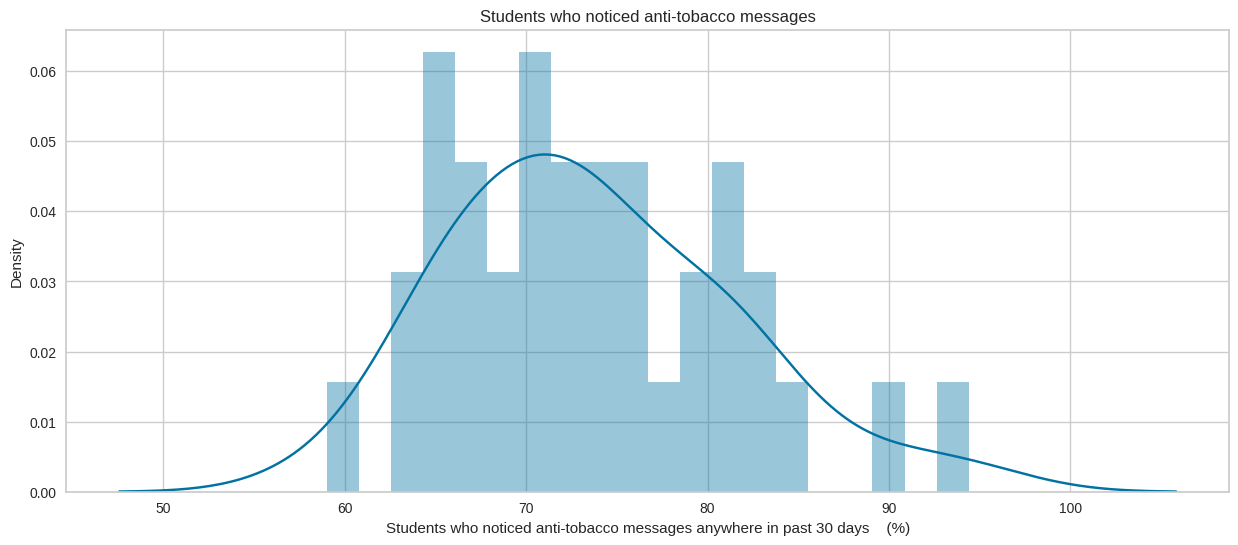

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#피처로 사용한 각종 데이터를 시각적으로 확인하기 위해 각각에 데이터를 시각화

plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Students who noticed anti-tobacco messages anywhere in past 30 days    (%)'], bins=20)
plt.title('Students who noticed anti-tobacco messages')
#지난 30일 동안 금연 메시지를 발견한 학생들 데이터 기준으로 데이터 분포 확인

<ipython-input-29-b56208b0fa15>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Students who noticed anti-tobacco messages in mass media in past 30 days    (%)'], bins=20)


Text(0.5, 1.0, 'Students who noticed anti-tobacco messages in mass media in past 30 days    (%)')

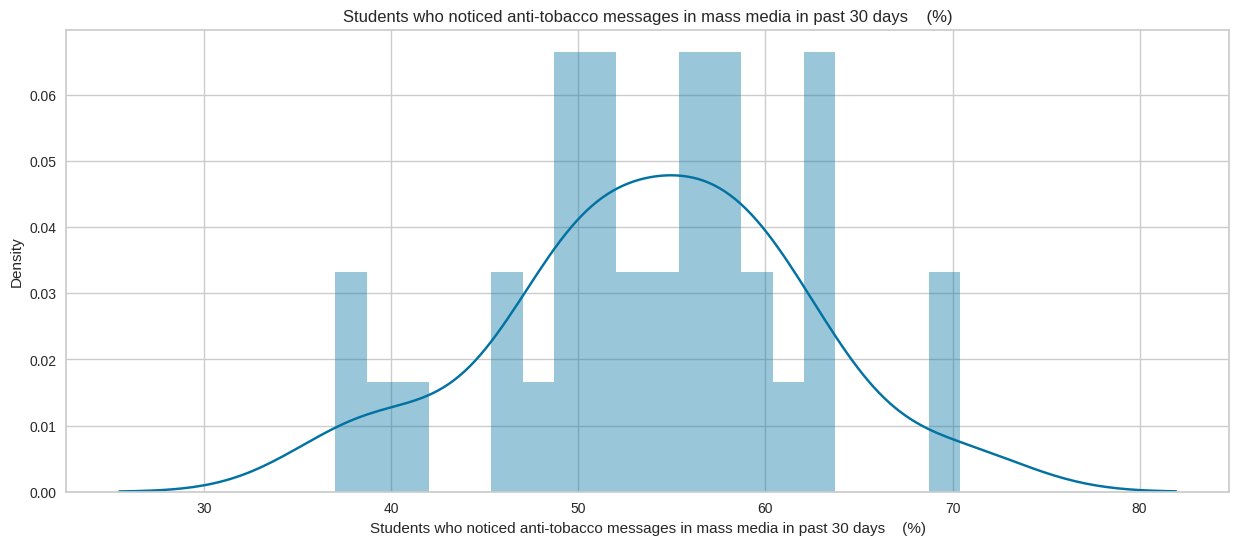

In [29]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Students who noticed anti-tobacco messages in mass media in past 30 days    (%)'], bins=20)
plt.title('Students who noticed anti-tobacco messages in mass media in past 30 days    (%)')
#30일간 대중매체에서 흡연반대 메시지를 발견한 학생들

<ipython-input-30-1763660b6e5e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans[ 'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)'], bins=20)


Text(0.5, 1.0, 'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)')

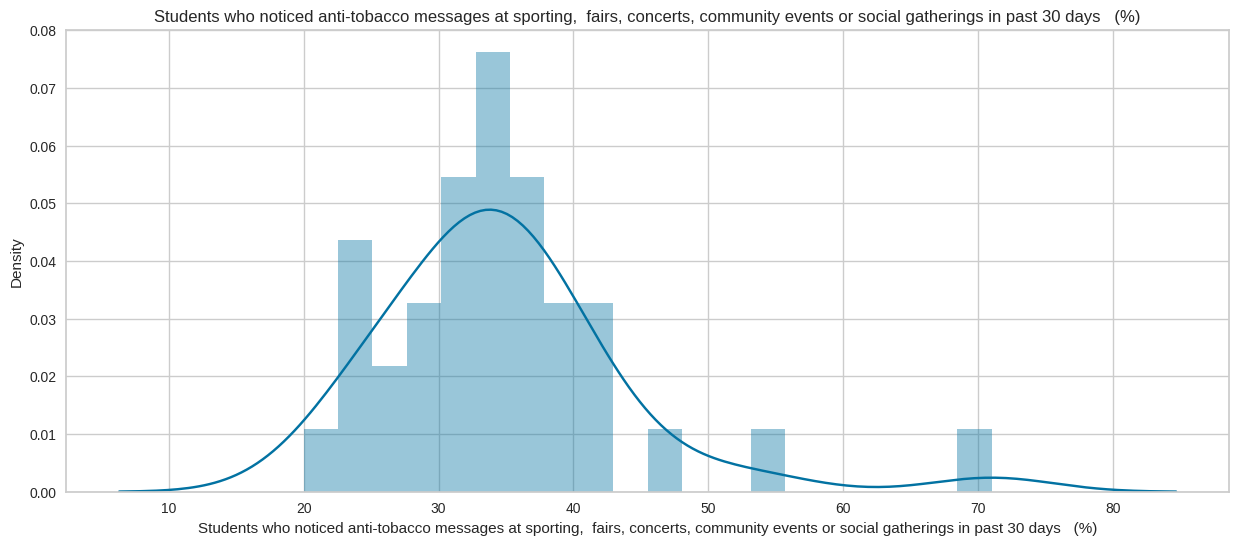

In [30]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans[ 'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)'], bins=20)
plt.title( 'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)')
#난 30일간 스포츠, 박람회, 콘서트, 지역사회 행사 또는 사교 모임에서 금연 메시지를 발견한 학생

<ipython-input-31-a6b5c0b165e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans[ 'Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)'], bins=20)


Text(0.5, 1.0, 'Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)')

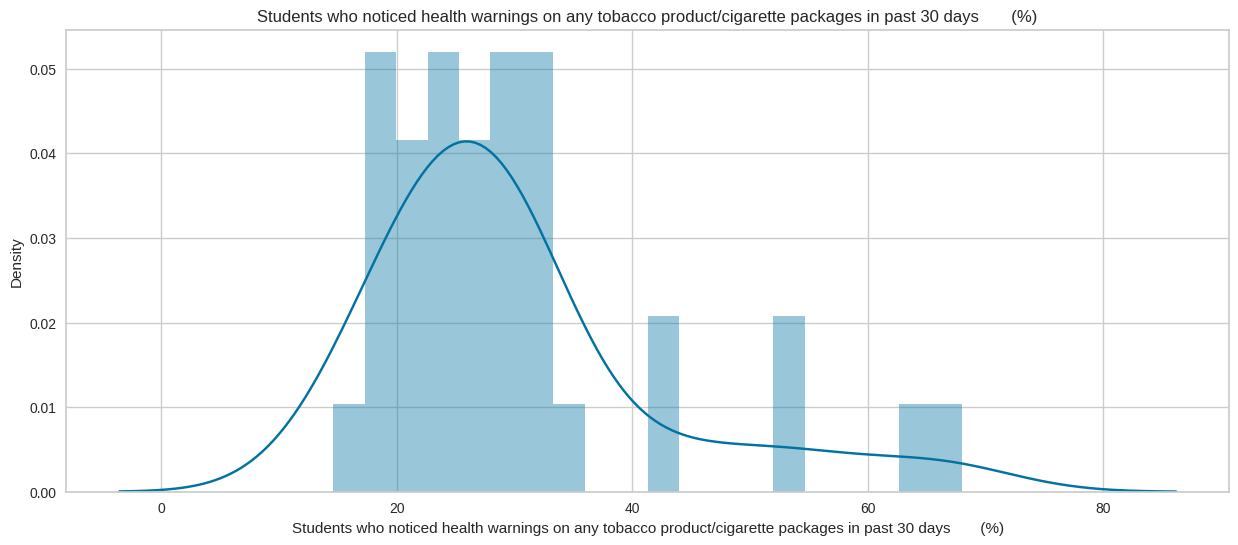

In [31]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans[ 'Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)'], bins=20)
plt.title('Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)')
#지난 30일 동안 담배 제품/담배 포장에서 건강 경고를 발견한 학생(%)

<ipython-input-32-588f77c51548>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans[ 'Students who saw tobacco advertisements anywhere in past 30 days  (%)'], bins=20)


Text(0.5, 1.0, 'Students who saw tobacco advertisements anywhere in past 30 days  (%)')

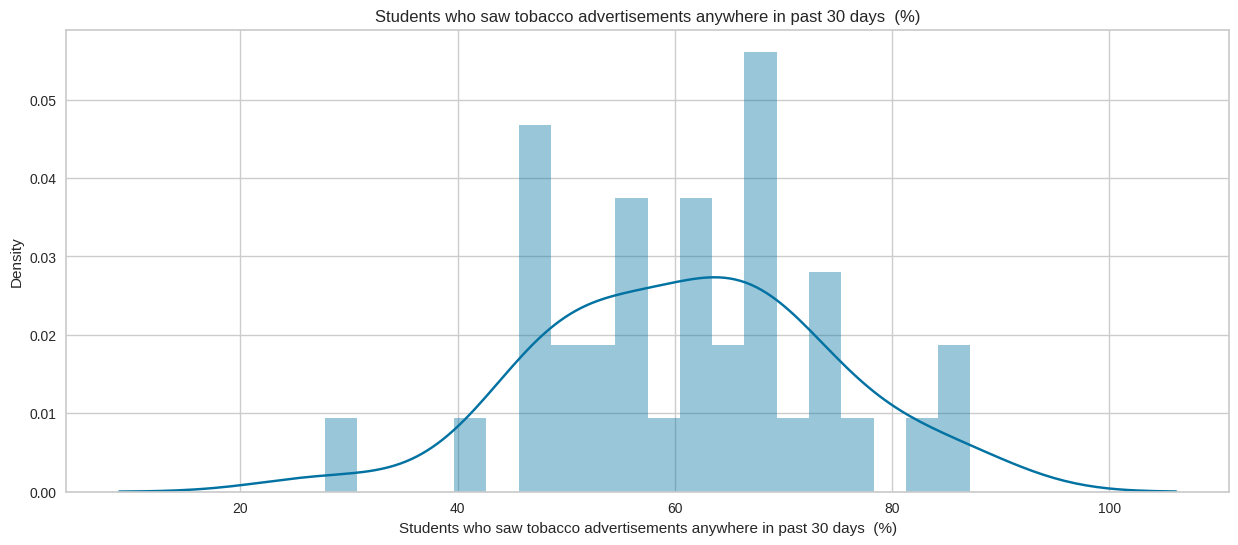

In [32]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans[ 'Students who saw tobacco advertisements anywhere in past 30 days  (%)'], bins=20)
plt.title( 'Students who saw tobacco advertisements anywhere in past 30 days  (%)')
#'지난 30일 동안 어디서나 담배 광고를 본 학생들(%)

<ipython-input-33-479799f8fd9a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans[ 'Students who saw anyone using tobacco on mass media in past 30 days  (%)'], bins=20)


Text(0.5, 1.0, 'Students who noticed anti-tobacco messages')

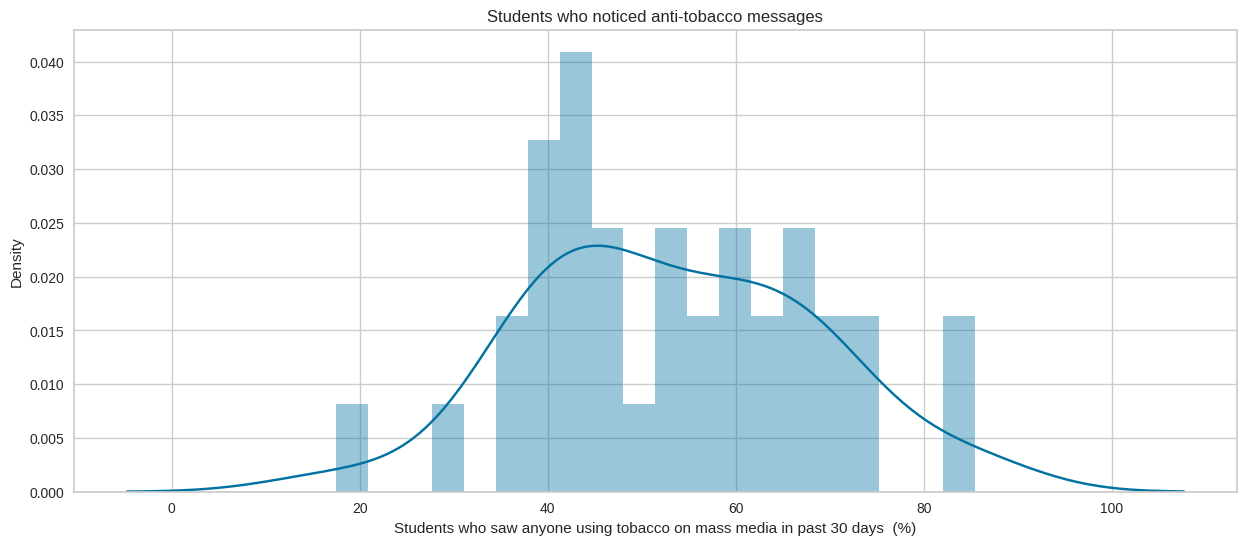

In [33]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans[ 'Students who saw anyone using tobacco on mass media in past 30 days  (%)'], bins=20)
plt.title('Students who noticed anti-tobacco messages')
#지난 30일 동안 대중 매체에서 담배를 사용하는 사람을 본 학생들(%)

<ipython-input-34-47b3ff83ed02>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans[ 'Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%)'], bins=20)


Text(0.5, 1.0, 'Students who noticed anti-tobacco messages')

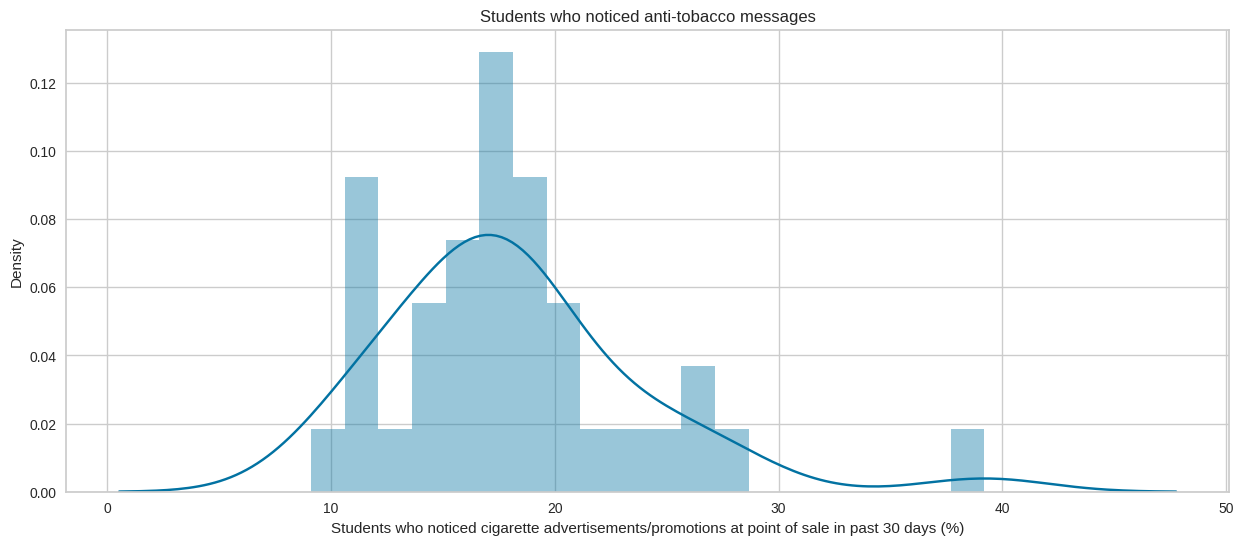

In [34]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans[ 'Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%)'], bins=20)
plt.title('Students who noticed anti-tobacco messages')
#지난 30일간 판매 시점에서 담배 광고/홍보를 눈치챈 학생(%)

<ipython-input-35-e2b9c5154f93>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Students who were taught in class about harmful effects of tobacco use during past 12 months (%)'], bins=20)


Text(0.5, 1.0, 'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)')

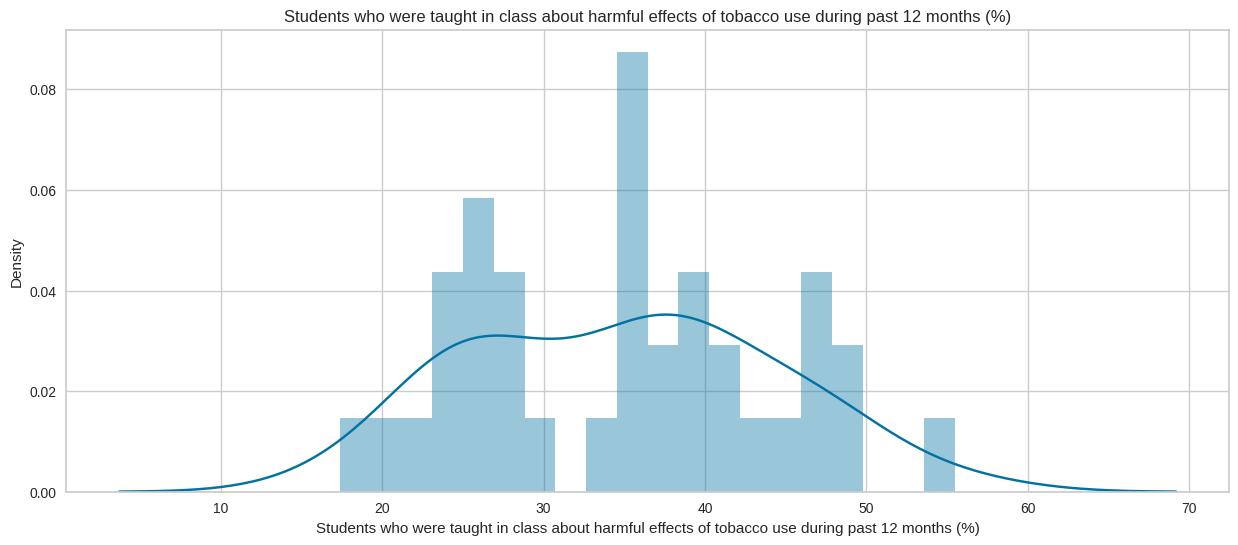

In [35]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Students who were taught in class about harmful effects of tobacco use during past 12 months (%)'], bins=20)
plt.title('Students who were taught in class about harmful effects of tobacco use during past 12 months (%)')
#지난 12개월 동안 수업시간에 담배 사용의 유해성에 대해 교육을 받은 학생들(%)

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
#피처들을 dendrogram을 이용하여 시각화하여 확인
plt.figure(figsize=(20,10))
cluster = linkage(data_values_kmeans, method='complete')
print(cluster.shape)

(35, 4)


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'Eunclidean distances')

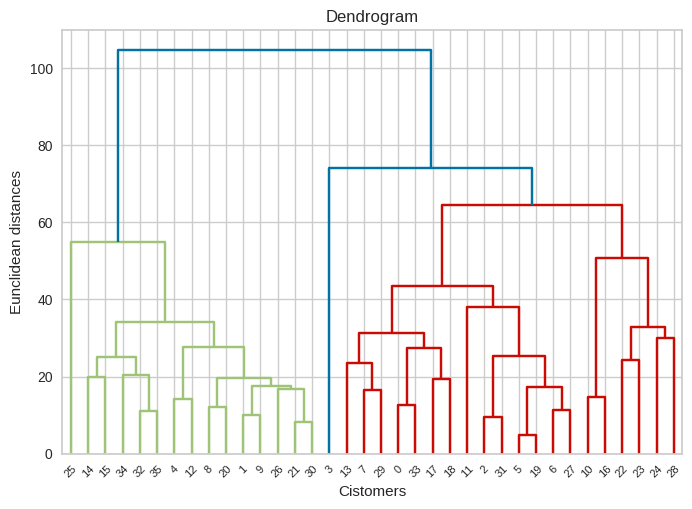

In [37]:
dendrogram = dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('Cistomers')
plt.ylabel('Eunclidean distances')

In [38]:
data_values_clusters['Cluster']

State/UT
India                          1
Andaman and Nicobar Islands    0
Andhra Pradesh                 1
Arunachal Pradesh              3
Assam                          0
Bihar                          1
Chandigarh                     1
Chhattisgarh                   1
Dadra and Nagar Haweli         0
Daman and Diu                  0
Delhi                          1
Goa                            1
Gujarat                        0
Haryana                        1
Himachal Pradesh               0
Jharkhand                      0
Karnataka                      1
Kerala                         0
Lakshadweep                    1
Madhya Pradesh                 1
Maharashtra                    0
Manipur                        0
Meghalaya                      2
Mizoram                        2
Nagaland                       2
Odisha                         0
Puducherry                     0
Punjab                         1
Rajasthan                      2
Sikkim                         2
T

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

X = data_values_clusters[['Students who noticed anti-tobacco messages anywhere in past 30 days    (%)',
       'Students who noticed anti-tobacco messages in mass media in past 30 days    (%)',
       'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)',
       'Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)',
       'Students who saw tobacco advertisements anywhere in past 30 days  (%)',
       'Students who saw anyone using tobacco on mass media in past 30 days  (%)',
       'Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%)',
       'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)']]
y = data_values_clusters['Cluster']

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
RF = RandomForestClassifier(n_estimators=100)
DC = DecisionTreeClassifier(random_state=42, max_depth=8)

Voting = VotingClassifier( estimators=[('lr', RF), ('rf', DC)], voting='hard')

In [41]:
cross_val_score(DC,X,y, cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.9464285714285714

In [42]:
DC = DecisionTreeClassifier(random_state=42, max_depth=8)
DC.fit(X_train, y_train)

feature_DC = DC.feature_importances_

for i, weight in enumerate(feature_DC):
    feature_name = f"Feature {i+1}"
    print(f"{feature_name}: {weight}")

Feature 1: 0.0
Feature 2: 0.0
Feature 3: 0.0
Feature 4: 0.3628210974312205
Feature 5: 0.6371789025687795
Feature 6: 0.0
Feature 7: 0.0
Feature 8: 0.0


In [43]:
new_data = [[52.3, 35.2, 25.2, 60.6, 52.8, 17.5, 37.8, 71.3]]

new = DC.predict(new_data)

print("Predicted Cluster:", new[0])

Predicted Cluster: 2


In [44]:
cross_val_score(Voting, X, y, cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.975

Feature 1: 0.2566706998837004
Feature 2: 0.21131527349371684
Feature 3: 0.16452735506529215
Feature 4: 0.11098466405866562
Feature 5: 0.08772070960533973
Feature 6: 0.06773881879048475
Feature 7: 0.052527684112750536
Feature 8: 0.048514794990049966


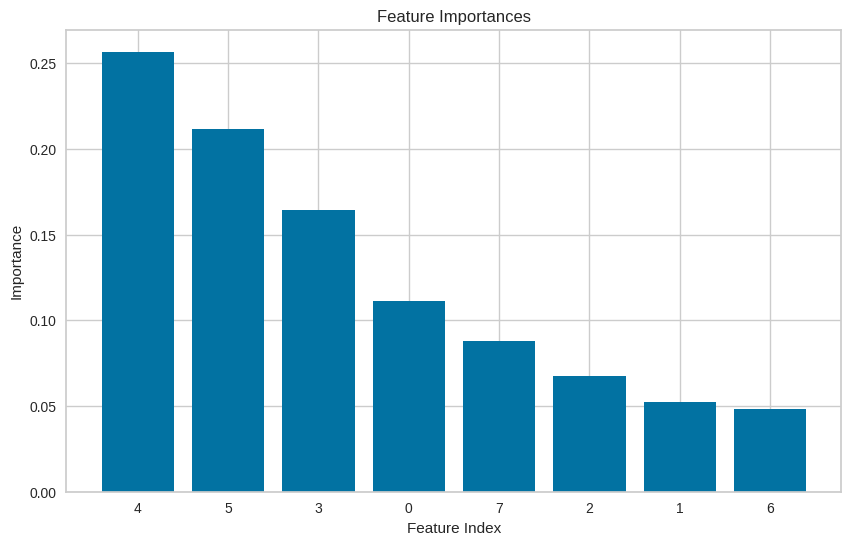

In [45]:
RF.fit(X_train, y_train)

feature_importances = RF.feature_importances_

indices = np.argsort(feature_importances)[::-1]

for i, feature_idx in enumerate(indices):
    print(f"Feature {i+1}: {feature_importances[feature_idx]}")

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

In [46]:
cross_val_score(RF, X, y, cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.975